In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from tifffile import imread
import numpy as np
import pickle
import os
import pandas as pd

root_dir = 'db'

In [2]:
ct_idx = 0
vol_dim = 9
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

/tmp/ipykernel_310052/744448111.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  ax[0].plot(compare['snw'], compare['kr_air'], 'g--', color='green', markersize=5)
/tmp/ipykernel_310052/744448111.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  ax[1].plot(compare['snw'], compare['kr_water'], 'g--', color='green', markersize=5)


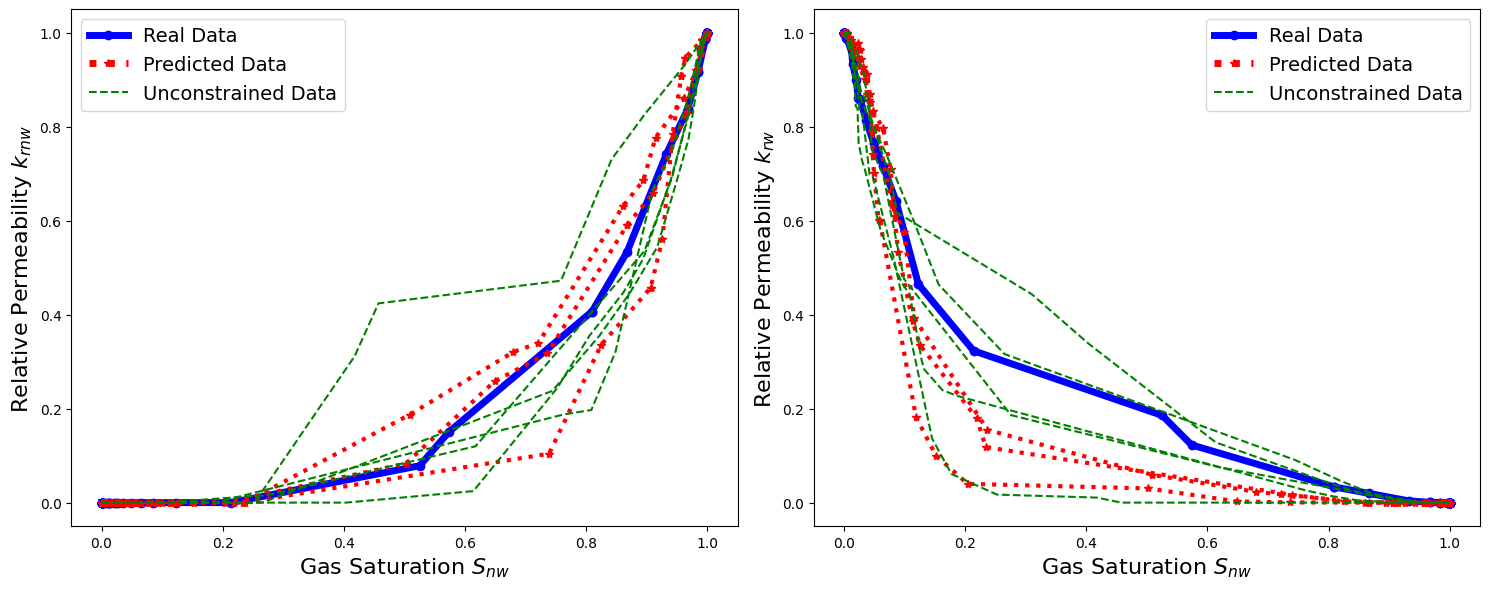

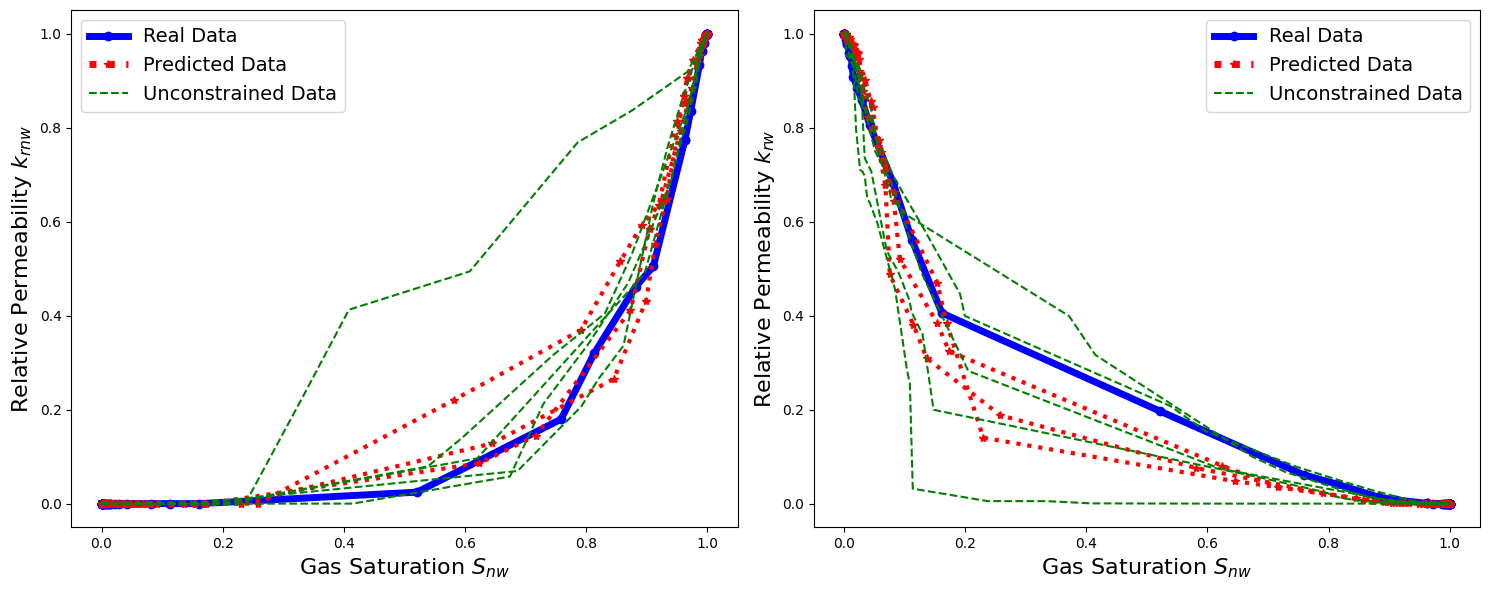

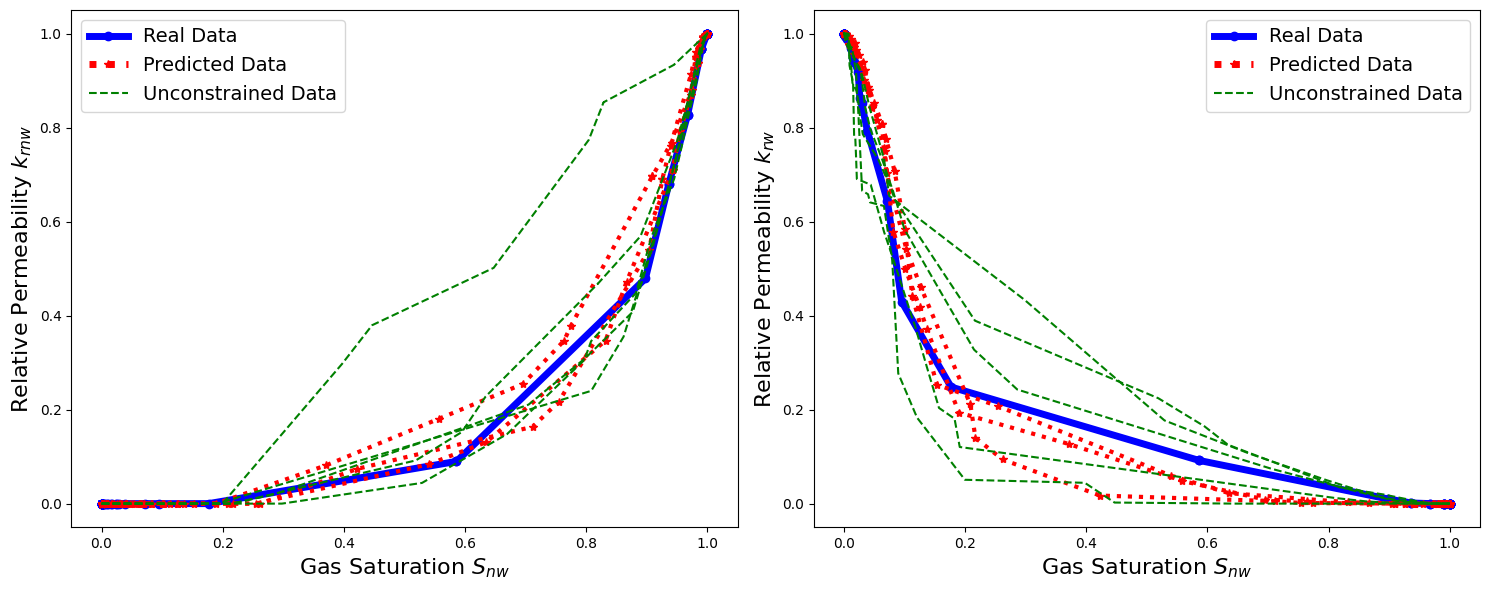

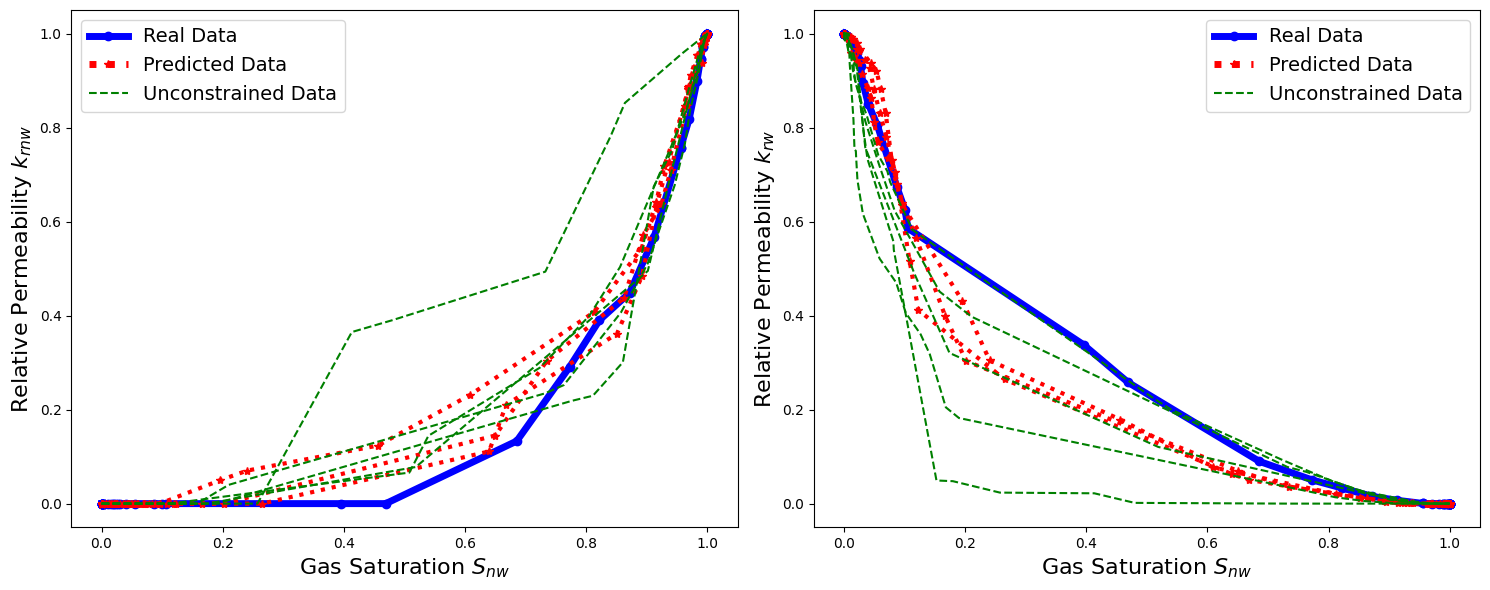

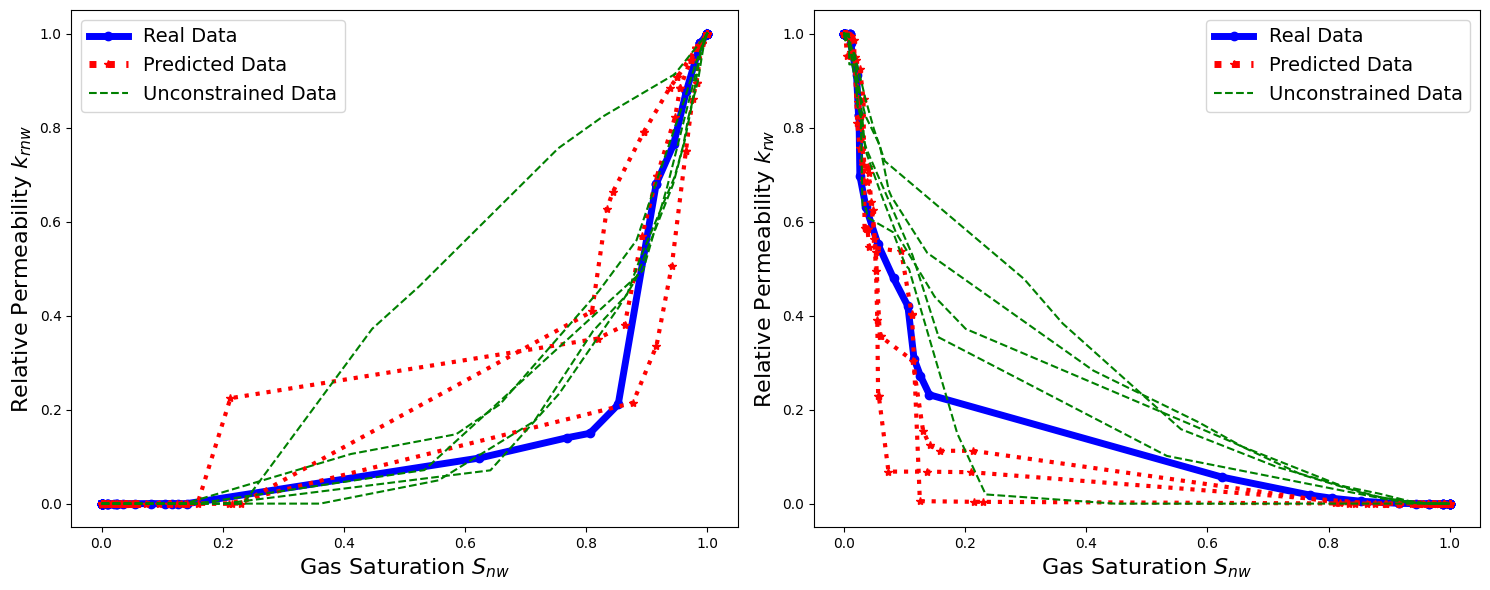

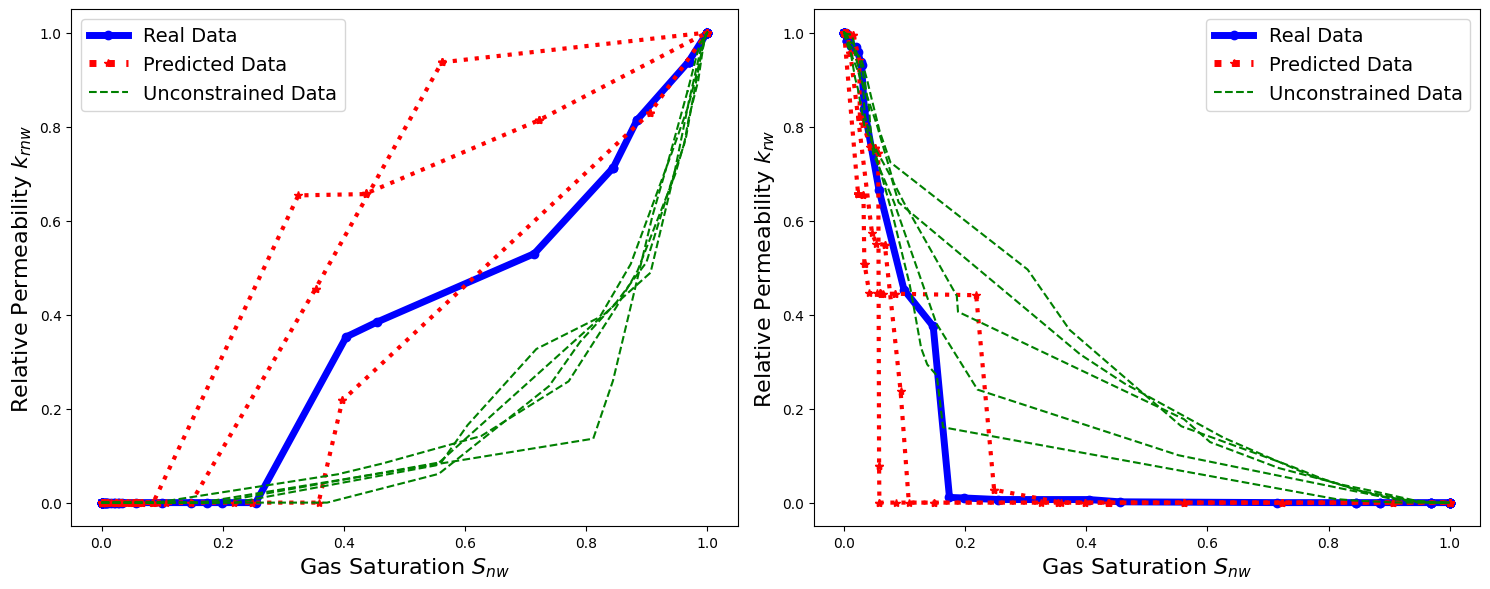

In [5]:
def plot_figure_kr(kr_results_real, kr_results_pred, sim_results):
    # Create figure with 1 row, 2 columns
    f, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Plot for Air (left subplot)
    ax[0].plot(kr_results_real['snw'], kr_results_real['kr_air'], 'bo-', linewidth=5)
    
    for ensemble in kr_results_pred:
        if not ensemble:
            continue
        ax[0].plot(ensemble['snw'], ensemble['kr_air'], 'r*:', linewidth=3)
    
    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if not compare:
            continue
        ax[0].plot(compare['snw'], compare['kr_air'], 'g--', color='green', markersize=5)

    # Plot for Water (right subplot)
    ax[1].plot(kr_results_real['snw'], kr_results_real['kr_water'], 'bo-', linewidth=5)
    
    for ensemble in kr_results_pred:
        if not ensemble:
            continue
        ax[1].plot(ensemble['snw'], ensemble['kr_water'], 'r*:', linewidth=3)
    
    for compare in compare_phys:
        if not compare:
            continue
        ax[1].plot(compare['snw'], compare['kr_water'], 'g--', color='green', markersize=5)

    # Set labels and titles for both subplots
    for axis in ax:
        axis.set_xlabel('Gas Saturation $S_{nw}$', fontsize=16)
        # Create legend with larger font size
        axis.legend(handles=[
            plt.Line2D([0], [0], color='blue', marker='o', linestyle='-', linewidth=5, label='Real Data'),
            plt.Line2D([0], [0], color='red', marker='*', linestyle=':', linewidth=5, label='Predicted Data'),
            plt.Line2D([0], [0], color='greeN', linestyle='--', markersize=5, label='Unconstrained Data')
        ], loc='best', fontsize=14)  # Increased legend font size

    # Set specific y-labels for each subplot
    ax[0].set_ylabel('Relative Permeability $k_{rnw}$', fontsize=16)
    ax[1].set_ylabel('Relative Permeability $k_{rw}$', fontsize=16)

    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()


for ct_idx in range(6):
    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        # Deserialize the data from the file and assign it to a variable
        sim_results = pickle.load(file)



    # plot original kr
    sample_idx = 0
    kr_results_real = sim_results[sample_idx]['original']
    kr_results_pred = sim_results[sample_idx]['generate'][:]

    # Usage remains the same:
    plot_figure_kr(kr_results_real, kr_results_pred, sim_results)

#### Vol 6

In [14]:
import matplotlib.pyplot as plt

plt.ioff()
def plot_subplot(ax, kr_results_real, kr_results_pred, sim_results, fluid_type, show_xlabel=False, show_title=False):
    if fluid_type == 'air':
        y_key = 'kr_air'
        title = 'Relative Permeability of Air'
        ylabel = '$k_{rnw}$'
    else:
        y_key = 'kr_water'
        title = 'Relative Permeability of Water'
        ylabel = '$k_{rw}$'

    ax.plot(kr_results_real['snw'], kr_results_real[y_key], 'bo-', linewidth=5)

    for ensemble in kr_results_pred:
        if ensemble:
            ax.plot(ensemble['snw'], ensemble[y_key], 'r*:', linewidth=4)

    compare_phys = sim_results['compare']
    for compare in compare_phys:
        if compare:
            ax.plot(compare['snw'], compare[y_key], 'g--', color='green', markersize=3)

    if show_xlabel:
        ax.set_xlabel('Gas Saturation $S_{nw}$', fontsize=20)
    else:
        ax.set_xlabel('')
    ax.set_ylabel(ylabel, fontsize=20)
    if show_title:
        ax.set_title(title, fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plot_grid(sim_results, ct_idx):
    fig, axs = plt.subplots(4, 2, figsize=(15, 22))

    for sample_idx in range(4):
        kr_results_real = sim_results[sample_idx]['original']
        kr_results_pred = sim_results[sample_idx]['generate'][:5]

        show_xlabel = (sample_idx == 3)  # Only show x-label for bottom row
        show_title = (sample_idx == 0)   # Only show title for top row

        plot_subplot(axs[sample_idx, 0], kr_results_real, kr_results_pred, sim_results, 'air', show_xlabel, show_title)
        plot_subplot(axs[sample_idx, 1], kr_results_real, kr_results_pred, sim_results, 'water', show_xlabel, show_title)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.1, hspace=0.3)  # Adjusted spacing

    # Add a single legend for all subplots
    handles = [
        plt.Line2D([], [], color='blue', marker='o', linestyle='-', linewidth=4, label='Real Data'),
        plt.Line2D([], [], color='red', marker='*', linestyle=':', linewidth=3, label='Predicted Data'),
        plt.Line2D([], [], color='green', linestyle='--', linewidth=2, label='Unconstrained Data')
    ]
    fig.legend(handles=handles, loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.5, 0.02))

    fig.savefig(f'kr_sim_ct_{ct_idx}_vol_6.png')

In [15]:
for ct_idx in range(6):
    vol_dim = 6

    with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
        sim_results = pickle.load(file)

    plot_grid(sim_results, ct_idx)

/tmp/ipykernel_310052/917577443.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  ax.plot(compare['snw'], compare[y_key], 'g--', color='green', markersize=3)
